Lets now look into classification.

Some of the examples are from [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). 

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 5s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]
type(train_labels[0])

numpy.int64

In [5]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_review

1654784/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

What is the problem with this data as it is? We have list of intigers. Each element as long as a given review.  
IMDB Dataset: https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset?msclkid=67c2fdb7c66911ec9c14c87c755eca0a

**Encoding the integer sequences via multi-hot encoding**

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

What are we loosing here?  
What have we lost with that encoding?

In [8]:
# The context
# the number of mentions of the word

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

y_train[0]

1.0

### Building your model

**Model definition**

**Thoughts and tips**  
This data is made of binary inputs and one number, scalar outputs. This is a rare and friendly set up.  
For this we use dense layers with relu activations. Sigmoid gets the score back to [0,1] for probability.  
What about loss? Crossentropy is best for probability problems.  
Rmsprop optimizer is a good start for every problem.

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

2022-04-28 17:24:19.672420: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Compiling the model**

In [12]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Try mean_squared_error!  
Change the architecture of the network.  
Do you have any questions regarding this... guessing match?

### Validating your approach

**Setting aside a validation set**

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5082 - accuracy: 0.7904 - val_loss: 0.3997 - val_accuracy: 0.8499
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2998 - accuracy: 0.9048 - val_loss: 0.3042 - val_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2212 - accuracy: 0.9267 - val_loss: 0.2768 - val_accuracy: 0.8920
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1756 - accuracy: 0.9409 - val_loss: 0.2773 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1433 - accuracy: 0.9548 - val_loss: 0.2809 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1206 - accuracy: 0.9611 - val_loss: 0.2933 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0992 - accuracy: 0.9702 - val_loss: 0.3217 - val_accuracy: 0.8813
Epoch 8/20
30

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

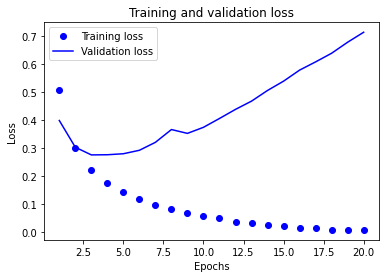

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

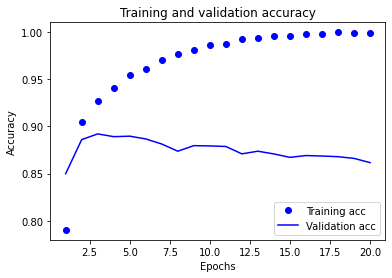

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 20ms/step - loss: 0.4873 - accuracy: 0.8102
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2757 - accuracy: 0.9069
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2077 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2936 - accuracy: 0.8838


In [19]:
results

[0.29359370470046997, 0.8837599754333496]

### Using a trained model to generate predictions on new data

In [20]:
model.predict(x_test)

array([[0.15682843],
       [0.9991357 ],
       [0.8131404 ],
       ...,
       [0.09904039],
       [0.05717039],
       [0.55170083]], dtype=float32)

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [19]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [20]:
len(train_data)

8982

In [21]:
len(test_data)

2246

In [22]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [54]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [24]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [25]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

So any idea what to do with the labels?

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [55]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Building your model

**Model definition**

Now we have way more classes to work with, and way more info that needs to diffrenciate between the data points.  
We need more neurons.  

In [28]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [29]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 48ms/step - loss: 2.7815 - accuracy: 0.4308 - val_loss: 1.8570 - val_accuracy: 0.6280
Epoch 2/20
16/16 [==============================] - 0s 29ms/step - loss: 1.4956 - accuracy: 0.7020 - val_loss: 1.3316 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 1s 32ms/step - loss: 1.0693 - accuracy: 0.7741 - val_loss: 1.1291 - val_accuracy: 0.7630
Epoch 4/20
16/16 [==============================] - 1s 35ms/step - loss: 0.8338 - accuracy: 0.8291 - val_loss: 1.0247 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 0.6609 - accuracy: 0.8646 - val_loss: 0.9658 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.5256 - accuracy: 0.8949 - val_loss: 0.9092 - val_accuracy: 0.8230
Epoch 7/20
16/16 [==============================] - 1s 34ms/step - loss: 0.4226 - accuracy: 0.9119 - val_loss: 0.8971 - val_accuracy: 0.8190
Epoch 8/20
16

**Plotting the training and validation loss**

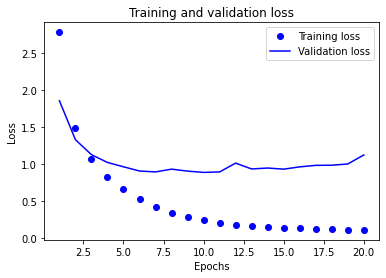

In [32]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

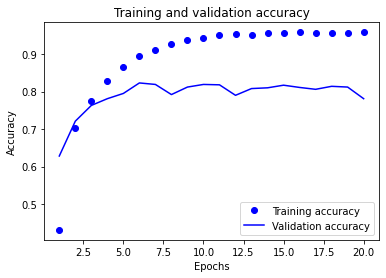

In [33]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [34]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 26ms/step - loss: 2.6377 - accuracy: 0.5171
Epoch 2/9
18/18 [==============================] - 0s 25ms/step - loss: 1.4260 - accuracy: 0.6991
Epoch 3/9
18/18 [==============================] - 0s 26ms/step - loss: 1.0481 - accuracy: 0.7799
Epoch 4/9
18/18 [==============================] - 0s 25ms/step - loss: 0.8213 - accuracy: 0.8249
Epoch 5/9
18/18 [==============================] - 0s 25ms/step - loss: 0.6494 - accuracy: 0.8613
Epoch 6/9
18/18 [==============================] - 0s 27ms/step - loss: 0.5155 - accuracy: 0.8922
Epoch 7/9
18/18 [==============================] - 1s 28ms/step - loss: 0.4165 - accuracy: 0.9127
Epoch 8/9
18/18 [==============================] - 0s 26ms/step - loss: 0.3423 - accuracy: 0.9272
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9661 - accuracy: 0.7841


In [35]:
results

[0.9661357402801514, 0.784060537815094]

In [36]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.182546749777382

### Generating predictions on new data

In [37]:
predictions = model.predict(x_test)

In [38]:
predictions[0].shape

(46,)

In [39]:
np.sum(predictions[0])

1.0

In [40]:
np.argmax(predictions[0])

3

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [43]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 2.7647 - accuracy: 0.4342 - val_loss: 2.0372 - val_accuracy: 0.5670
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 1.7203 - accuracy: 0.5960 - val_loss: 1.6272 - val_accuracy: 0.6150
Epoch 3/20
63/63 [==============================] - 1s 15ms/step - loss: 1.4170 - accuracy: 0.6486 - val_loss: 1.4995 - val_accuracy: 0.6440
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 1.2546 - accuracy: 0.6688 - val_loss: 1.4457 - val_accuracy: 0.6460
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1503 - accuracy: 0.7097 - val_loss: 1.4674 - val_accuracy: 0.6600
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 1.0784 - accuracy: 0.7300 - val_loss: 1.4540 - val_accuracy: 0.6690
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 1.0175 - accuracy: 0.7398 - val_loss: 1.4807 - val_accuracy: 0.6690
Epoch 8/20
63